In [0]:
#Install Tensor flow
!pip install -q tensorflow==2.0.beta1

In [0]:
import tensorflow as tf
#print(tf.__version__)

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [17]:
#Get the data from gitHub
!wget https://github.com/NitinShindeJ/TensorFlow2.0/tree/master/tf2.0/moore.csv

--2020-04-08 10:48:14--  https://github.com/NitinShindeJ/TensorFlow2.0/tree/master/tf2.0/moore.csv
Resolving github.com (github.com)... 140.82.112.3
Connecting to github.com (github.com)|140.82.112.3|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://github.com/NitinShindeJ/TensorFlow2.0/blob/master/tf2.0/moore.csv [following]
--2020-04-08 10:48:14--  https://github.com/NitinShindeJ/TensorFlow2.0/blob/master/tf2.0/moore.csv
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/html]
Saving to: ‘moore.csv’

moore.csv               [ <=>                ]  97.84K   491KB/s    in 0.2s    

2020-04-08 10:48:15 (491 KB/s) - ‘moore.csv’ saved [100187]



In [20]:
#Load the data
df = pd.read_csv('moore.csv', header=None, error_bad_lines=False).values

b'Skipping line 49: expected 1 fields, saw 2\nSkipping line 79: expected 1 fields, saw 7\nSkipping line 126: expected 1 fields, saw 3\nSkipping line 143: expected 1 fields, saw 6\nSkipping line 144: expected 1 fields, saw 3\nSkipping line 168: expected 1 fields, saw 4\nSkipping line 172: expected 1 fields, saw 2\nSkipping line 174: expected 1 fields, saw 2\nSkipping line 175: expected 1 fields, saw 2\nSkipping line 176: expected 1 fields, saw 2\nSkipping line 177: expected 1 fields, saw 2\nSkipping line 178: expected 1 fields, saw 2\nSkipping line 179: expected 1 fields, saw 2\nSkipping line 180: expected 1 fields, saw 2\nSkipping line 181: expected 1 fields, saw 2\nSkipping line 185: expected 1 fields, saw 2\nSkipping line 186: expected 1 fields, saw 2\nSkipping line 192: expected 1 fields, saw 2\nSkipping line 200: expected 1 fields, saw 4\nSkipping line 206: expected 1 fields, saw 2\nSkipping line 211: expected 1 fields, saw 2\nSkipping line 212: expected 1 fields, saw 2\nSkipping l

In [0]:
X=df[:,0].reshape(-1,1) #make it 2D array of size NxD where D=1
Y=df[:,1]

TypeError: ignored

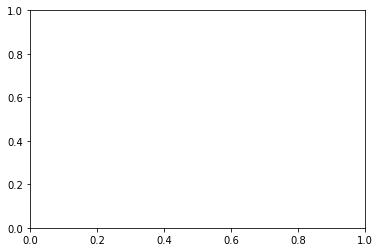

In [23]:
df

array([['<!DOCTYPE html>'],
       ['<html lang="en">'],
       ['  <head>'],
       ...,
       ['  <div aria-live="polite" class="js-global-screen-reader-notice sr-only"></div>'],
       ['  </body>'],
       ['</html>']], dtype=object)

In [36]:
#Load the data
df = pd.read_csv('moore_1.csv', header=None, error_bad_lines=False).values

b'Skipping line 29: expected 3 fields, saw 4\nSkipping line 57: expected 3 fields, saw 4\nSkipping line 69: expected 3 fields, saw 4\nSkipping line 71: expected 3 fields, saw 4\nSkipping line 72: expected 3 fields, saw 4\nSkipping line 73: expected 3 fields, saw 4\nSkipping line 74: expected 3 fields, saw 4\nSkipping line 75: expected 3 fields, saw 4\nSkipping line 76: expected 3 fields, saw 4\nSkipping line 77: expected 3 fields, saw 4\nSkipping line 78: expected 3 fields, saw 4\nSkipping line 79: expected 3 fields, saw 4\nSkipping line 80: expected 3 fields, saw 4\nSkipping line 81: expected 3 fields, saw 4\nSkipping line 82: expected 3 fields, saw 4\nSkipping line 83: expected 3 fields, saw 4\nSkipping line 84: expected 3 fields, saw 4\nSkipping line 85: expected 3 fields, saw 4\nSkipping line 86: expected 3 fields, saw 4\nSkipping line 87: expected 3 fields, saw 4\nSkipping line 88: expected 3 fields, saw 4\nSkipping line 89: expected 3 fields, saw 4\nSkipping line 90: expected 3 f

In [0]:
import re

X = []
Y = []

# some numbers show up as 1,170,000,000 (commas)
# some numbers have references in square brackets after them
non_decimal = re.compile(r'[^\d]+')

for line in open('moore_1.csv'):
    r = line.split('\t')

    x = int(non_decimal.sub('', r[2].split('[')[0]))
    y = int(non_decimal.sub('', r[1].split('[')[0]))
    X.append(x)
    Y.append(y)


X = np.array(X)
Y = np.array(Y)

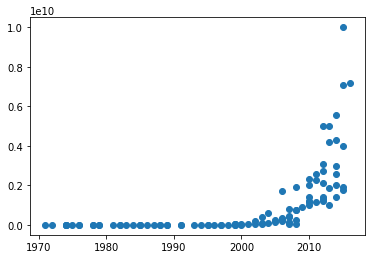

In [38]:
#Plot the data
plt.scatter(X, Y);

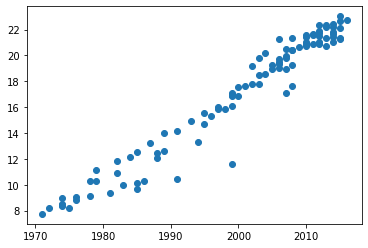

In [39]:
#So we want  linear model take log
Y= np.log(Y) 
plt.scatter(X,Y);

In [0]:
#Pre processing X
# center X, X is the year so large range values, 
X=X-X.mean()

In [43]:
#Now we create TensorFlow
model = tf.keras.models.Sequential([
                                    tf.keras.layers.Input(shape=(1,)),
                                    tf.keras.layers.Dense(1)])

model.compile(optimizer=tf.keras.optimizers.SGD(0.001, 0.9), loss='mse')
#model.compile(Optimizer='adam', loss='mse')

#learning rate scheduler
def schedule(epoch, lr):
  if epoch >= 50:
    return 0.0001
  return 0.001

scheduler = tf.keras.callbacks.LearningRateScheduler(schedule)

#Train the model
r = model.fit(X, Y, epochs=200, callbacks=[scheduler])

Train on 102 samples
Epoch 1/200
102/102 [==============================] - 0s 727us/sample - loss: 296.7641
Epoch 2/200
102/102 [==============================] - 0s 85us/sample - loss: 290.5010
Epoch 3/200
102/102 [==============================] - 0s 64us/sample - loss: 259.2537
Epoch 4/200
102/102 [==============================] - 0s 67us/sample - loss: 231.1567
Epoch 5/200
102/102 [==============================] - 0s 66us/sample - loss: 218.3512
Epoch 6/200
102/102 [==============================] - 0s 75us/sample - loss: 167.9320
Epoch 7/200
102/102 [==============================] - 0s 97us/sample - loss: 163.2623
Epoch 8/200
102/102 [==============================] - 0s 54us/sample - loss: 152.7849
Epoch 9/200
102/102 [==============================] - 0s 64us/sample - loss: 115.0577
Epoch 10/200
102/102 [==============================] - 0s 61us/sample - loss: 86.7276
Epoch 11/200
102/102 [==============================] - 0s 71us/sample - loss: 77.3198
Epoch 12/200
102/102 

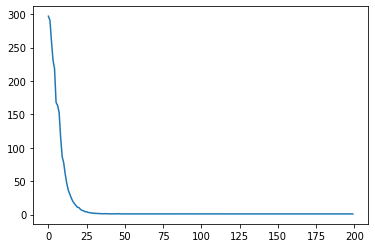

In [45]:
#Plot the loss
plt.plot(r.history['loss'], label='loss')

In [46]:
#Get the slope of the line
#Slope of the line is related to the doubling rate of transistor count
print(model.layers) #Note: there is only 1 layer, the 'Input' layer doesn't count
print(model.layers[0].get_weights())

[array([[0.34796974]], dtype=float32), array([16.951452], dtype=float32)]


In [0]:
#Slope of the line is
a = model.layers[0].get_weights()[0][0,0]

In [49]:
a

0.34796974

In [50]:
print('Time to Double:', np.log(2)/a)

Time to Double: 1.99197544966583


In [51]:
#If You want Analytical Soln
X = np.array(X).flatten()
Y=np.array(Y)
denominator = X.dot(X)-X.mean()*X.sum()
a = (X.dot(Y)-Y.mean()*X.sum()) / denominator
b = (Y.mean()*X.dot(X)-X.mean()*X.dot(Y))/denominator

print(a,b)
print('Time to Double:', np.log(2)/a)

0.35104357336423775 16.96984782380809
Time to Double: 1.9745331723841182
